In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df.shape

(768, 9)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [26]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot: xlabel='Outcome', ylabel='count'>

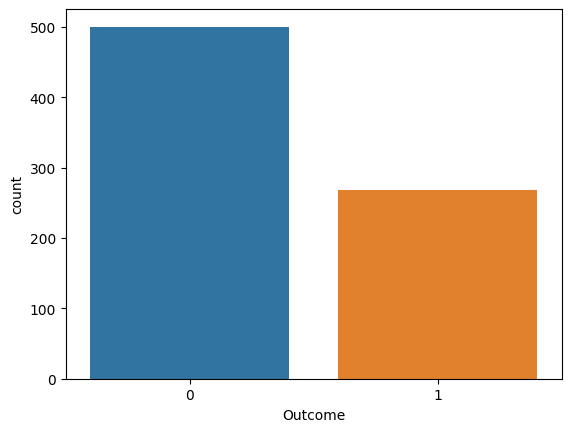

In [29]:
sns.countplot(x='Outcome',data=df)

In [30]:
# Replace Zeroes
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

# Here we are replacing numpy with NaN which means it does not exist
for column in zero_not_accepted :
  df[column] = df[column].replace(0, np.NaN)


print(df.isna().sum())
  


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [31]:
mean = int(df[column].mean(skipna = True))
df[column] = df[column].replace(np.NaN, mean)
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<AxesSubplot: xlabel='Outcome', ylabel='Glucose'>

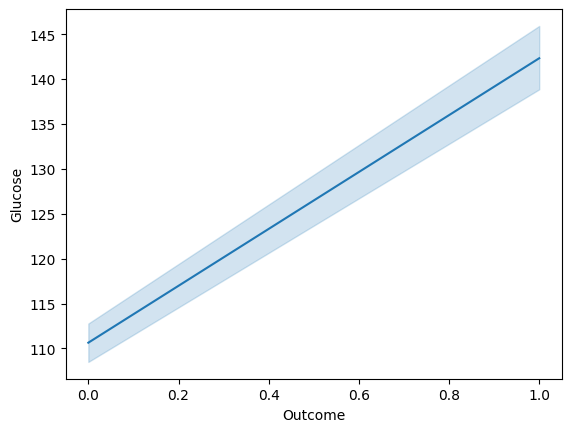

In [33]:
sns.lineplot(x='Outcome',y='Glucose',data=df)

<AxesSubplot: xlabel='Outcome', ylabel='Pregnancies'>

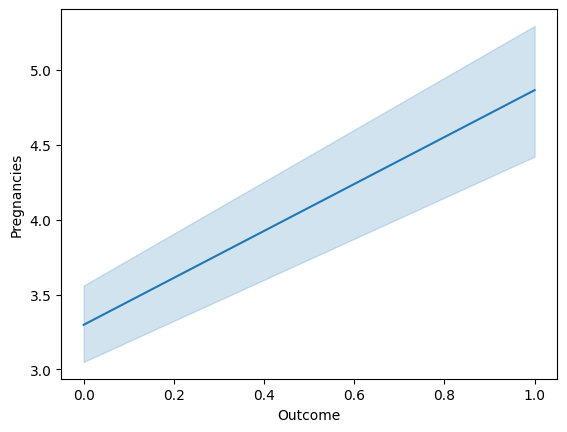

In [34]:
sns.lineplot(x='Outcome',y='Pregnancies',data=df)

<AxesSubplot: xlabel='Outcome', ylabel='BloodPressure'>

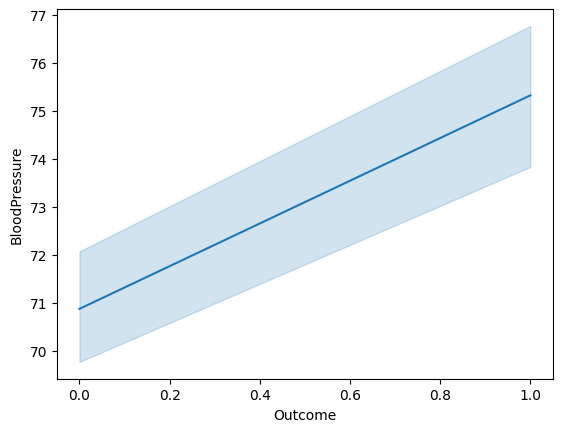

In [35]:
sns.lineplot(x='Outcome',y='BloodPressure',data=df)

In [36]:
# Separate features and labels
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
label = 'Outcome'
X, y = df[features].values, df[label].values

for n in range(0,9):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [6.0, 148.0, 72.0, 35.0, 155.0, 33.6, 0.627, 50.0] 
  Label: 1
Patient 2 
  Features: [1.0, 85.0, 66.0, 29.0, 155.0, 26.6, 0.351, 31.0] 
  Label: 0
Patient 3 
  Features: [8.0, 183.0, 64.0, nan, 155.0, 23.3, 0.672, 32.0] 
  Label: 1
Patient 4 
  Features: [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] 
  Label: 0
Patient 5 
  Features: [0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] 
  Label: 1
Patient 6 
  Features: [5.0, 116.0, 74.0, nan, 155.0, 25.6, 0.201, 30.0] 
  Label: 0
Patient 7 
  Features: [3.0, 78.0, 50.0, 32.0, 88.0, 31.0, 0.248, 26.0] 
  Label: 1
Patient 8 
  Features: [10.0, 115.0, nan, nan, 155.0, 35.3, 0.134, 29.0] 
  Label: 0
Patient 9 
  Features: [2.0, 197.0, 70.0, 45.0, 543.0, 30.5, 0.158, 53.0] 
  Label: 1


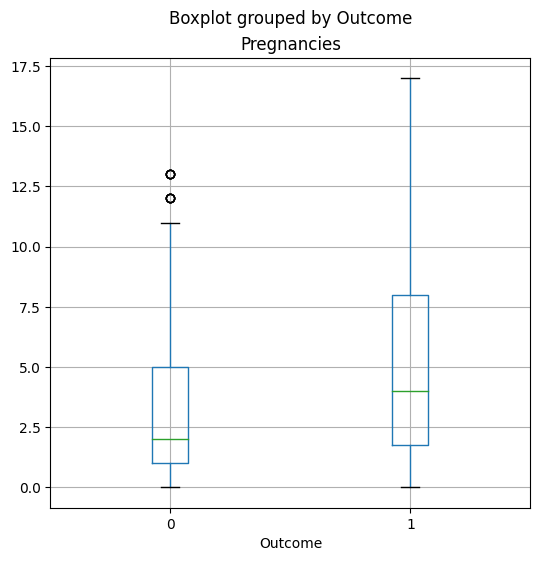

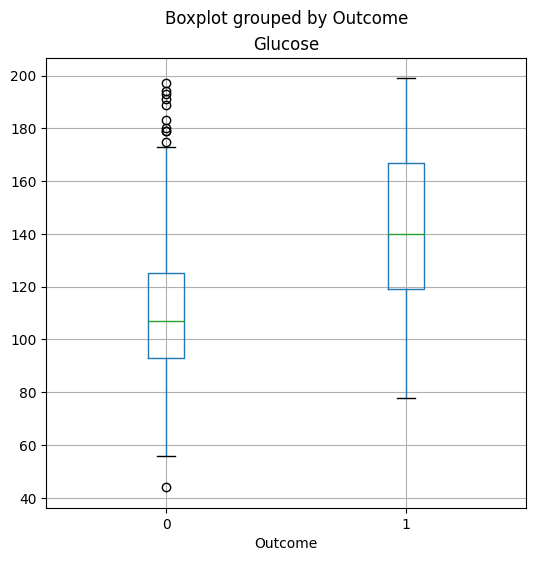

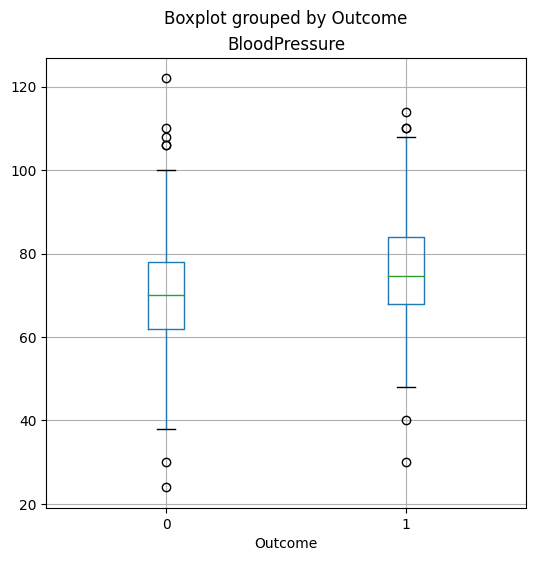

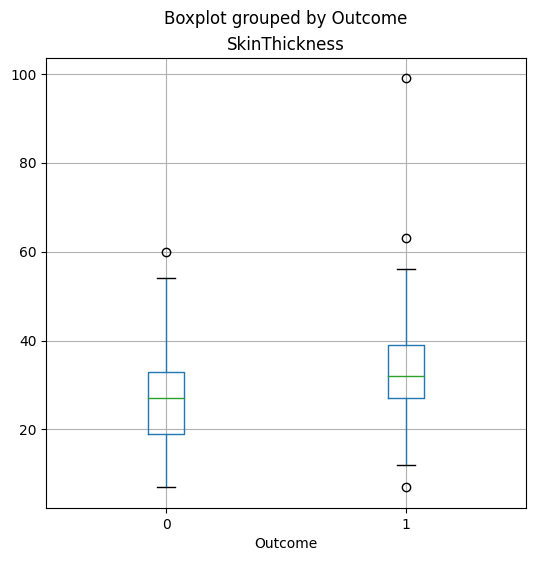

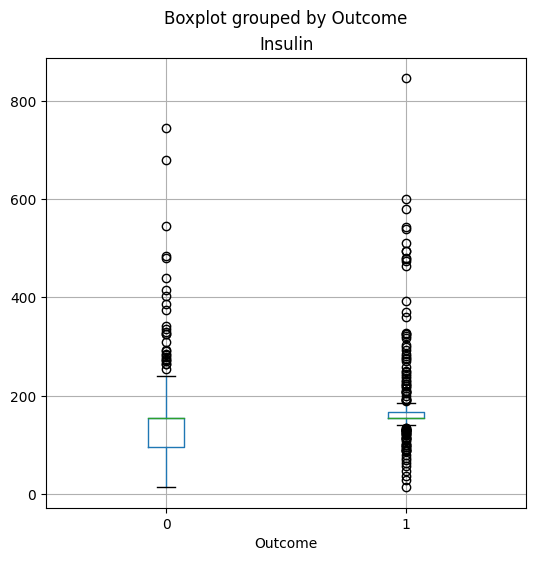

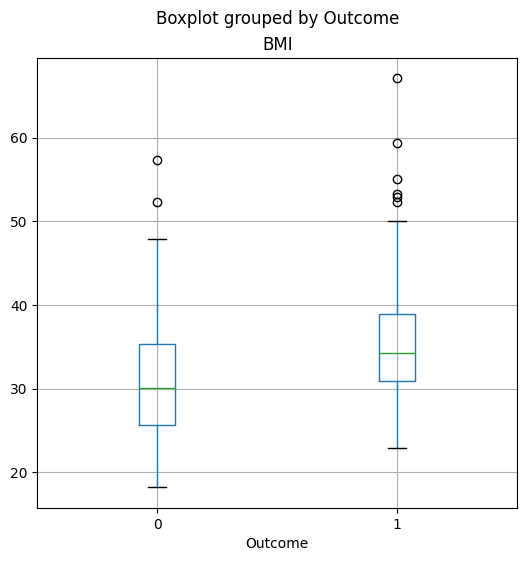

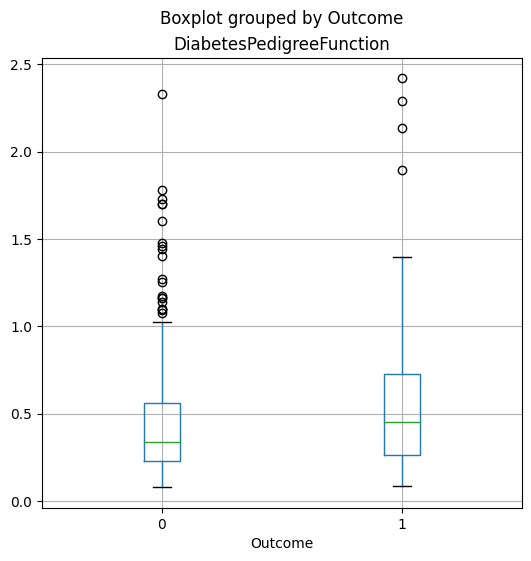

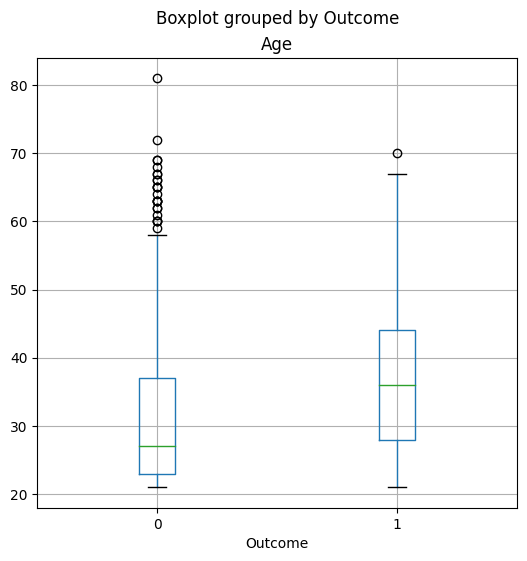

In [37]:
from matplotlib import pyplot as plt
%matplotlib inline

#features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
for col in features:
    df.boxplot(column=col, by='Outcome', figsize=(6,6))
    plt.title(col)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 537
Test cases: 231


In [39]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Split dataset into train and test
X = df.iloc[:, 0:8]
Y = df.iloc[:,8]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 0, test_size = 0.2)

NameError: name 'train_test_split' is not defined